# Experiments with evaluation
First we experiment with the new training set where event hits are sampled across all timeslices. We evaluate the two training sets with 3 new test sets:
1. No related hits (slice 0)
2. low related hits (slice 3650)
2. medium related hits (slice 1800)
3. high related hits (slice 1637)

In [1]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.utils as model_utils
import km3net.model.eval as model_eval
import km3net.data.utils as data_utils
import km3net.model.data.pm as data_pm
from km3net.model.mlp import MLP
from torch.nn import BCELoss
from torch.optim import SGD, Adam
import torch
import pandas as pd

## Experiment 1

+ Data: 50% of slice 615 (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 16) -> (16, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: 10

### Remarks
Model performs really well for test sets with (realistic) very less number of related hits. The PRAUC will not increase unless we increase the number of positive class examples (makes sense because it looks at the recall of the model!). The PRAUC is again very low for test sets with low examples of positive class since there are not many examples to plot! (this is expected).

In [5]:
# training & validation sets
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
print("train size: {0}, valid size: {1}".format(
    len(train_dl.dataset),len(valid_dl.dataset)))

# testing sets
test_path_high = DATADIR+'/test/slice-1637-10-diff.csv'
test_path_medium = DATADIR+'/test/slice-1800-50-diff.csv'
test_path_low = DATADIR+'/test/slice-3650-50-diff.csv'
test_path_no = DATADIR+'/test/slice-0-10-diff.csv'
test_dl_high = data_pm.prepare_test_data(test_path_high,normalise=True)
test_dl_medium = data_pm.prepare_test_data(test_path_medium,normalise=True)
test_dl_low = data_pm.prepare_test_data(test_path_low,normalise=True)
test_dl_no = data_pm.prepare_test_data(test_path_no,normalise=True)
print("test high size: {}, test medium size: {}, test low size: {}, test no size: {}".format(
    len(test_dl_high.dataset), len(test_dl_medium.dataset),
    len(test_dl_low.dataset), len(test_dl_no.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
#     'test_dl': [test_dl_high, test_dl_medium, test_dl_low, test_dl_no],
    'test_dl': [test_dl_low],
    'device': device
}

metrics = model_utils.evaluate(**params)
# the evaluation metrics cannot be used when we do not have both classes
# so we remove it and do a simple check manually
no_metrics = metrics.pop()

train size: 193898, valid size: 95502
test high size: 364231, test medium size: 5880735, test low size: 5829405, test no size: 774390
---
epochs: 0, train loss: 0.025, valid loss: 0.012
epochs: 1, train loss: 0.010, valid loss: 0.009
epochs: 2, train loss: 0.009, valid loss: 0.008
epochs: 3, train loss: 0.009, valid loss: 0.009
epochs: 4, train loss: 0.009, valid loss: 0.008
epochs: 5, train loss: 0.008, valid loss: 0.009
epochs: 6, train loss: 0.008, valid loss: 0.008
epochs: 7, train loss: 0.008, valid loss: 0.008
epochs: 8, train loss: 0.008, valid loss: 0.009
epochs: 9, train loss: 0.008, valid loss: 0.008
---


In [6]:
for metric in metrics:
    print("---***---***---")
    model_eval.evaluate(**metric)

## Experiment 2

+ Data: 10% of slice mixed (equalized classes, diff)
+ Loss: BCELoss
+ Optimizer: SGD(lr=0.001, momentum=0.9)
+ Layers: (inputs, 16) -> (16, 8) -> (8, 1)
+ Activation: hidden -> ReLu, output -> Sigmoid
+ Epochs: 25

### Remarks
TODO

In [8]:
# training & validation sets
train_path = DATADIR+'/train/slice-mixed-10-equal-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
print("train size: {0}, valid size: {1}".format(
    len(train_dl.dataset),len(valid_dl.dataset)))

# testing sets
test_path_high = DATADIR+'/test/slice-1637-10-diff.csv'
test_path_medium = DATADIR+'/test/slice-1800-50-diff.csv'
test_path_low = DATADIR+'/test/slice-3650-50-diff.csv'
test_path_no = DATADIR+'/test/slice-0-10-diff.csv'
test_dl_high = data_pm.prepare_test_data(test_path_high,normalise=True)
test_dl_medium = data_pm.prepare_test_data(test_path_medium,normalise=True)
test_dl_low = data_pm.prepare_test_data(test_path_low,normalise=True)
test_dl_no = data_pm.prepare_test_data(test_path_no,normalise=True)
print("test high size: {}, test medium size: {}, test low size: {}, test no size: {}".format(
    len(test_dl_high.dataset), len(test_dl_medium.dataset),
    len(test_dl_low.dataset), len(test_dl_no.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 25,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': [test_dl_high, test_dl_medium, test_dl_low, test_dl_no],
    'device': device
}

metrics = model_utils.evaluate(**params)
# the evaluation metrics cannot be used when we do not have both classes
# so we remove it and do a simple check manually
no_metrics = metrics.pop()

train size: 48434, valid size: 23856
test high size: 364231, test medium size: 5880735, test low size: 5829405, test no size: 774390
---
epochs: 0, train loss: 0.043, valid loss: 0.042
epochs: 1, train loss: 0.039, valid loss: 0.037


KeyboardInterrupt: 

## Evaluation
### No positive class (no related hits)

In [3]:
import sklearn.metrics as skmetrics

Confusion matrix without normalization
Confusion matrix with normalization


/home/ashome/km3net/km3net/model/eval.py:18: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


<module 'matplotlib.pyplot' from '/home/ashome/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

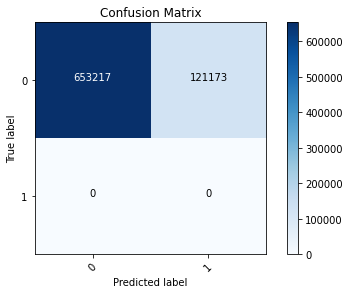

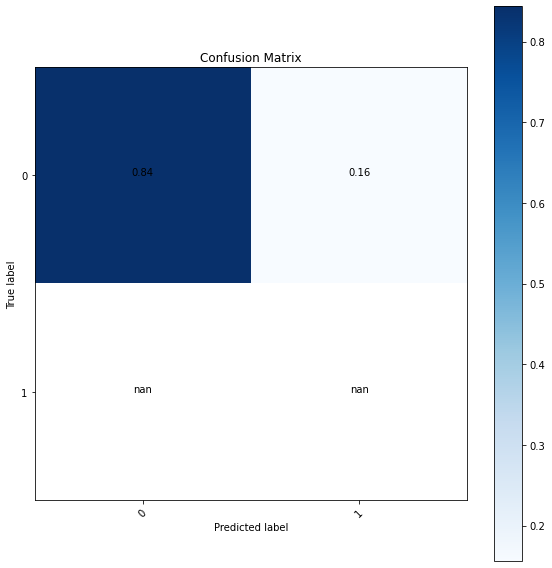

<Figure size 576x576 with 0 Axes>

In [4]:
no_y_true, no_y_pred, no_y_score = no_metrics['y_true'], no_metrics['y_pred'], no_metrics['y_score']
no_cm = skmetrics.confusion_matrix(no_y_true, no_y_pred)
model_eval.confusion_matrix(no_cm, classes=[0, 1])
model_eval.confusion_matrix(no_cm, classes=[0, 1], normalize=True)

### And the rest

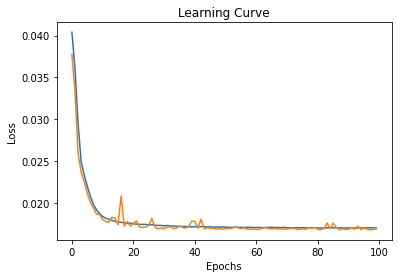

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


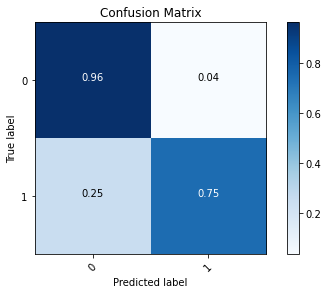

<Figure size 576x576 with 0 Axes>

Confusion matrix without normalization


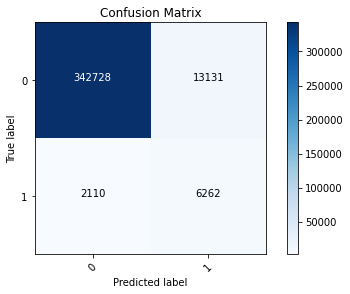

<Figure size 576x576 with 0 Axes>

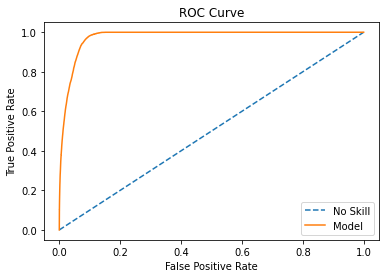

<Figure size 576x576 with 0 Axes>

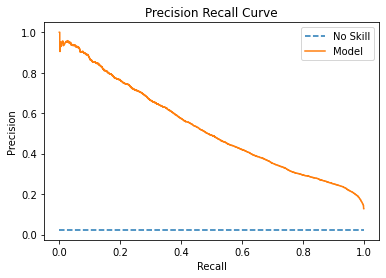

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98    355859
         1.0       0.32      0.75      0.45      8372

    accuracy                           0.96    364231
   macro avg       0.66      0.86      0.71    364231
weighted avg       0.98      0.96      0.97    364231

ROC AUC: 0.977
Precision Recall AUC: 0.526
F1 Score: 0.451
F2 Score: 0.592


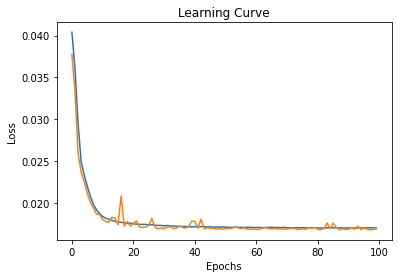

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


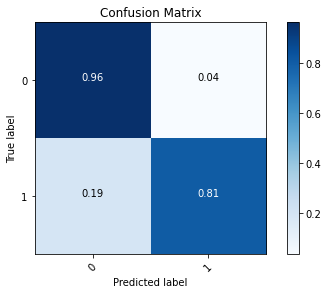

<Figure size 576x576 with 0 Axes>

Confusion matrix without normalization


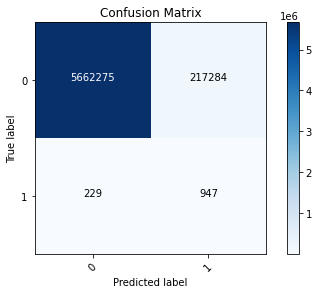

<Figure size 576x576 with 0 Axes>

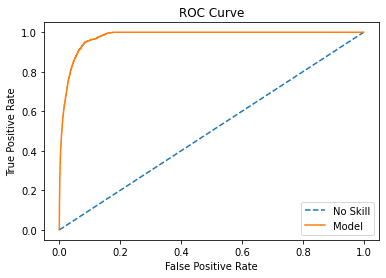

<Figure size 576x576 with 0 Axes>

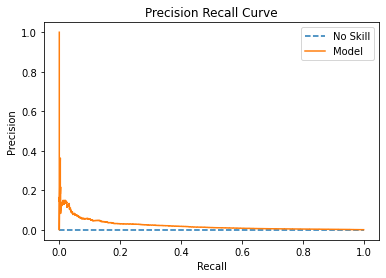

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98   5879559
         1.0       0.00      0.81      0.01      1176

    accuracy                           0.96   5880735
   macro avg       0.50      0.88      0.49   5880735
weighted avg       1.00      0.96      0.98   5880735

ROC AUC: 0.978
Precision Recall AUC: 0.023
F1 Score: 0.009
F2 Score: 0.021


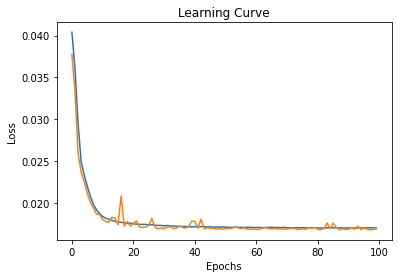

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


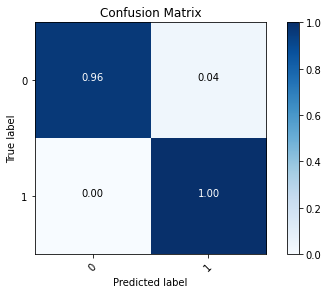

<Figure size 576x576 with 0 Axes>

Confusion matrix without normalization


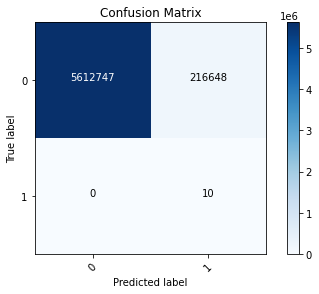

<Figure size 576x576 with 0 Axes>

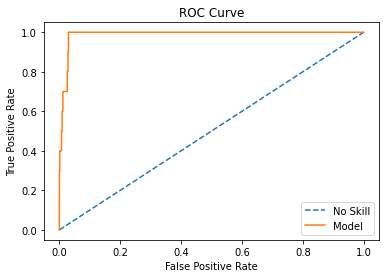

<Figure size 576x576 with 0 Axes>

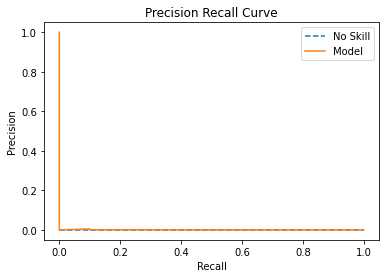

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98   5829395
         1.0       0.00      1.00      0.00        10

    accuracy                           0.96   5829405
   macro avg       0.50      0.98      0.49   5829405
weighted avg       1.00      0.96      0.98   5829405

ROC AUC: 0.988
Precision Recall AUC: 0.001
F1 Score: 0.000
F2 Score: 0.000


In [5]:
for metric in metrics:
    model_eval.evaluate(**metric)